In [94]:
print("Hello!")

Hello!


房價預測

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

載入 Boston 房價資料集

In [96]:
with open('./housing.data', encoding='utf8') as f:
    data = f.readlines()
all_fields = []
for line in data:
    line2 = line[1:].replace('   ', ' ').replace('  ', ' ')
    fields = []
    for item in line2.split(' '):
        fields.append(float(item.strip()))
        if len(fields) == 14:
            all_fields.append(fields)
df = pd.DataFrame(all_fields)
df.columns = 'CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV'.split(',')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [98]:
# 描述統計量
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,1.716290,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,2.653510,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.250895,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,2.326717,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,9.966540,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [99]:
# 描述統計量
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,1.716290,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,2.653510,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.250895,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,2.326717,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,9.966540,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: ylabel='Count'>

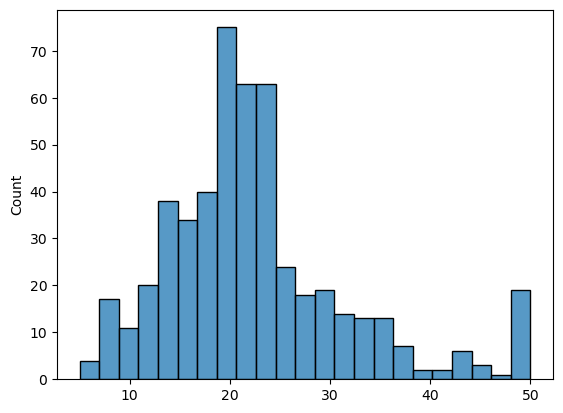

In [100]:
# 直方圖
import seaborn as sns

X, y = df.drop('MEDV', axis=1).values, df.MEDV.values
sns.histplot(x=y)

4. 資料分割

In [101]:
# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# 查看陣列維度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

特徵縮放

In [102]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

5. 選擇演算法

In [103]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

6. 模型訓練

In [104]:
model.fit(X_train_std, y_train)

LinearRegression()

7. 模型評分

In [105]:
y_pred = model.predict(X_test_std)

In [106]:
y_pred,y_test

(array([17.11752184, 24.96255292, 24.58487748, 22.54517209, 14.65177512,
        23.86976759, 16.88986904, 12.16782916, 32.10601689, 23.02161789,
        23.19372334, 25.1134406 , 13.19111786, 24.6670994 , 19.56183143,
        34.00889971, 21.70506055, 26.34220383, 19.26754843, 30.86036963,
        31.11478486, 28.9787045 , 28.39674064, 19.92398296, 15.52758427,
        32.06716194, 22.22645858, 24.62303436, 20.14787829, -0.87000971,
        23.55137451, 29.01933921, 19.47900077, 34.85776057, 22.31697708,
        15.80678188, 26.88156373, 25.06510272, 23.99848407, 26.93454031,
        15.26406302, 12.75605762, 10.6097355 , 17.00178836, 28.4621455 ,
        22.67287789, 20.55353025, 28.60971163, 23.05057604, 11.47940663,
        34.31667009, 22.03331502,  5.22177931, 19.36910983, 25.77792139,
        25.72036203, 21.27674555, 15.86432646, 14.7809503 , 10.165682  ,
        36.5812202 , 22.97435704, 23.35795361, 22.26405657, 26.33785594,
        26.42941286, 18.3976417 , 38.85351552, 30.1

鳶尾花(Iris)品種的辨識

In [107]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

1. 載入資料集

In [108]:
ds = datasets.load_iris()

In [109]:
import pandas as pd
df = pd.DataFrame(ds.data,columns=ds.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [110]:
y = ds.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [111]:
ds.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [113]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: >

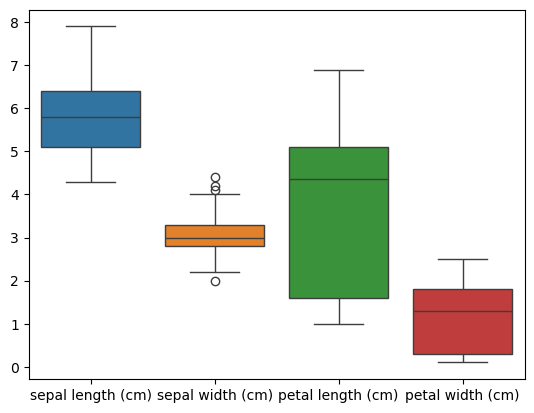

In [114]:
# 箱型圖
import seaborn as sns
sns.boxplot(data=df)

In [115]:
# 指定X，並轉為 Numpy 陣列
X = df.values

# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# 查看陣列維度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [116]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [117]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [118]:
clf.fit(X_train_std,y_train)

LogisticRegression()

In [119]:
y_pred = clf.predict(X_test_std)
y_pred,y_test

(array([1, 0, 2, 2, 1, 1, 2, 2, 0, 2, 1, 1, 0, 1, 2, 2, 1, 1, 1, 0, 0, 1,
        1, 1, 0, 1, 2, 2, 2, 0]),
 array([1, 0, 2, 2, 1, 1, 2, 2, 0, 2, 1, 1, 0, 1, 2, 2, 1, 1, 1, 0, 0, 1,
        1, 1, 0, 1, 2, 2, 2, 0]))

In [120]:
# 混淆矩陣
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[ 7  0  0]
 [ 0 13  0]
 [ 0  0 10]]


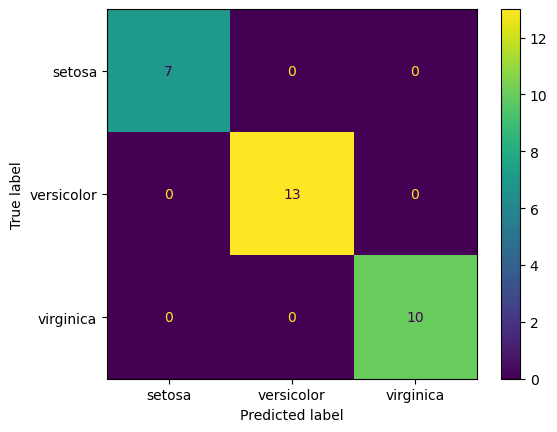

In [121]:
# 混淆矩陣圖
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)
                              , display_labels=ds.target_names)
disp.plot()
plt.show()

鳶尾花資料集群集測試

In [122]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [123]:
x, y = datasets.load_iris(return_X_y=True)

In [124]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, init='k-means++', n_init='auto')

In [125]:
model.fit(x)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [126]:
# 計算準確率
y_pred = model.predict(X)

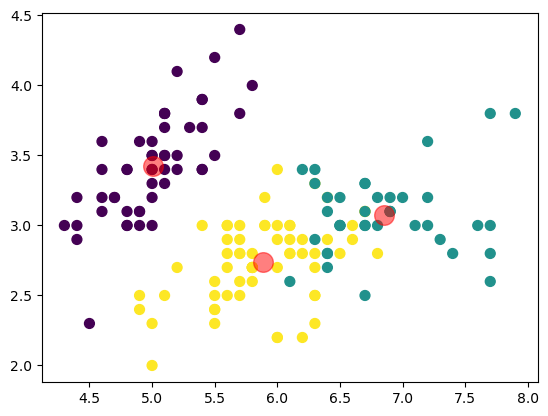

In [127]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

Numpy複習

In [128]:
import numpy as np

In [129]:
my_list = [1,2,127]
type(my_list)

list

In [130]:
my_array = np.array(my_list,np.int8)
type(my_array)

numpy.ndarray

In [131]:
my_array.dtype

dtype('int8')

In [132]:
my_matrix =[ [1,2,3],
            [4,5,6],
            [7,8,9]]
np.array(my_matrix)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

###arange

在給定的間隔內返回均勻間隔的值。[[參考資料](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.arange.html)]

In [133]:
np.arange(0,11)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [134]:
np.arange(0,11,2)

array([ 0,  2,  4,  6,  8, 10])

In [135]:
np.arange(11,0,-1)

array([11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [136]:
np.zeros(3)

array([0., 0., 0.])

In [137]:
np.zeros((3,2))

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [138]:
np.linspace(0,10,3)

array([ 0.,  5., 10.])

In [139]:
np.linspace(0,5,20)

array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
       1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
       2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
       3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [140]:
newArray = np.eye(4)*5
print(newArray)

[[5. 0. 0. 0.]
 [0. 5. 0. 0.]
 [0. 0. 5. 0.]
 [0. 0. 0. 5.]]


## Random
NumPy也有許多方法來創建隨機數陣列：

### rand
創建一個給定形狀的陣列，並用來自於[0, 1)的均勻分布的隨機樣本填充它。[[參考資料](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.rand.html)]

In [141]:
np.random.rand(3)

array([0.22939475, 0.26593792, 0.3603451 ])

In [142]:
np.random.rand(3,2)

array([[0.25994986, 0.45324085],
       [0.03231595, 0.27976351],
       [0.41120672, 0.60278188]])

###randn

從“標準正態”分佈[σ = 1]返回樣本（或樣本）。
與 rand 不同，靠近零的值更有可能出現。[[參考資料](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.randn.html)]

標準正態分佈是一種特殊的常態分佈，其平均數（μ）為0，標準差（σ）為1。
在標準正態分佈中，數據點主要集中在平均值附近，並且隨著距離平均值的增加而呈指數下降。
這種分佈的曲線形狀呈鐘形，並且在平均值附近有一個尖峰。

在機器學習和統計學中，標準正態分佈通常用於建模和分析，並且在許多算法和技術中被廣泛應用。

In [143]:
np.random.rand(3)

array([0.27095764, 0.13318513, 0.07620038])

In [144]:
np.random.rand(5,5)

array([[0.94053183, 0.41663906, 0.58116262, 0.91917655, 0.08274842],
       [0.87666149, 0.55158787, 0.16483426, 0.41125512, 0.77760228],
       [0.48037008, 0.98528605, 0.37673897, 0.7495783 , 0.39298945],
       [0.82916422, 0.56908147, 0.06351183, 0.03682187, 0.13385212],
       [0.01367196, 0.07535906, 0.6917144 , 0.53434628, 0.74991075]])

In [145]:
myDate = np.random.rand(1000000)
print("mean:",myDate.mean())
print("std:",myDate.std())

mean: 0.500045130344451
std: 0.28862076886885196


randint
從low（包含）到high（不包含）返回隨機整數。 [[參考資料](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html)]

In [146]:
np.random.randint(1,100,10)

array([98, 48, 44, 31, 39,  2, 51, 43, 22, 60], dtype=int32)

In [147]:
# replace=False 表示不允许重复
np.random.choice([5,8,2,6,5,9,10,20],3,replace=False)

array([20,  6,  8])

In [148]:
arr = np.arange(1,100)
print(arr)
np.random.shuffle(arr)
print(arr)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99]
[95 61 54 98 52 36 83 50 66 51 85 89 87 19 64 76 65 16 45 17 82 47 70 18
 20 59 43 48 32 42 80 30 28  4  1 26 25 11 86 60 94 75 56 39 93 74 58 13
  8 35 81  9 55 78 40 22 38 41  5 29  6 46 14 84 99 24 91 53 27  7 49 79
 69 21 67 97 34 57 31 10 77 73 15 92  2 12 96 68 37 90 23 88 33 71 62 72
  3 63 44]


seed

可以用來設置隨機狀態，以便可以重現相同的“隨機”結果。[[參考資料](https://numpy.org/doc/stable/reference/random/generated/numpy.random.seed.html)]

In [149]:
np.random.seed(42)
np.random.randint(1,100,10)

array([52, 93, 15, 72, 61, 21, 83, 87, 75, 75], dtype=int32)

Reshape
返回一個包含相同數據但具有新形狀的陣列。[[參考資料](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html)]

In [150]:
arr = np.arange(25)
print(arr)
newArray = arr.reshape(5,5)
print(newArray)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


In [151]:
newArray[0,3] = 100
print(newArray)

[[  0   1   2 100   4]
 [  5   6   7   8   9]
 [ 10  11  12  13  14]
 [ 15  16  17  18  19]
 [ 20  21  22  23  24]]


In [152]:
print(arr)

[  0   1   2 100   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24]


In [153]:
ranar = np.random.randint(0,50,10)
print(ranar)

[23 35 39 23  2 21  1 23 43 29]


In [154]:
ranar.max()

np.int32(43)

In [155]:
ranar.argmax()

np.int64(8)

In [156]:
ranar.min()

np.int32(1)

In [157]:
ranar.argmin()

np.int64(6)